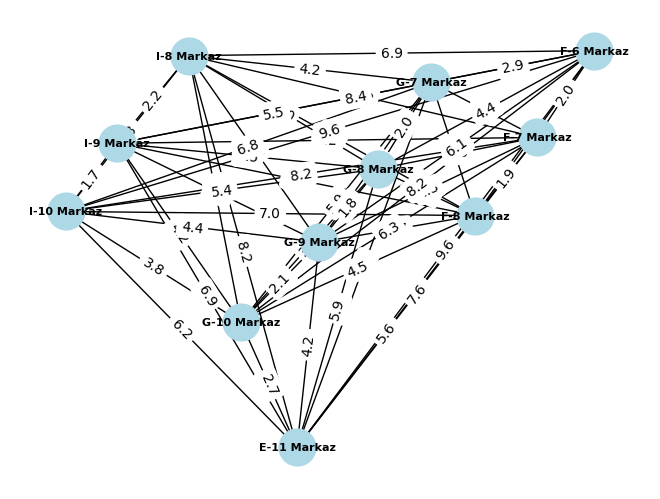

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq
import random
import math

# Coordinates for each markaz
markaz_coordinates = {
    'I-8 Markaz': (33.6677, 73.0752),
    'I-9 Markaz': (33.6567, 73.0558),
    'I-10 Markaz': (33.6488, 73.0407),
    'G-7 Markaz':(33.7049,73.0693),
    'G-8 Markaz': (33.6967 , 73.0501),
    'G-9 Markaz': (33.6877 , 73.0339),
    'G-10 Markaz': (33.6757, 73.0162),
    'F-6 Markaz': (33.7299, 73.0763),
    'F-7 Markaz': (33.7211, 73.0571),
    'F-8 Markaz': (33.7116, 73.0398),
    'E-11 Markaz': (33.6843, 72.9885),
    
}

# Function to calculate Haversine distance between two points (lat, lon)
def haversine_distance(coords1, coords2):
    # Radius of the Earth in kilometers
    R = 6371.0

    lat1, lon1 = math.radians(coords1[0]), math.radians(coords1[1])
    lat2, lon2 = math.radians(coords2[0]), math.radians(coords2[1])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    distance = R * c
    return round(distance,1)


# Function to create a graph with distances
def create_graph_with_coordinates(markaz_coordinates, distance_threshold=15.0):
    G = nx.Graph()

    # Add nodes with coordinates
    for markaz, coords in markaz_coordinates.items():
        G.add_node(markaz, pos=coords)

    # Add edges based on distances
    for markaz1, coords1 in markaz_coordinates.items():
        for markaz2, coords2 in markaz_coordinates.items():
            if markaz1 != markaz2:
                distance = haversine_distance(coords1, coords2)
                if distance <= distance_threshold:
                    G.add_edge(markaz1, markaz2, weight=distance)

    return G

# Create a graph with distances
markaz_graph = create_graph_with_coordinates(markaz_coordinates, distance_threshold=15.0)

# Draw the graph
pos = nx.get_node_attributes(markaz_graph, 'pos')
nx.draw(markaz_graph, pos, with_labels=True, font_weight='bold', node_size=700, node_color='lightblue', font_size=8)
labels = nx.get_edge_attributes(markaz_graph, 'weight')
nx.draw_networkx_edge_labels(markaz_graph, pos, edge_labels=labels)
plt.show()



In [2]:
source_markaz = "I-8 Markaz"
destination_markaz = "F-7 Markaz"

# Function for uniform cost search
def uniform_cost_search(graph, start, goal):
    visited = set()
    priority_queue = [(0, start, [])]

    while priority_queue:
        cost, current, path = heapq.heappop(priority_queue)

        if current not in visited:
            visited.add(current)
            path = path + [current]

            if current == goal:
                return path, cost, visited

            for neighbor in graph.neighbors(current):
                if neighbor not in visited:
                    heapq.heappush(priority_queue, (cost + graph[current][neighbor]['weight'], neighbor, path))

    return None, None, None



In [3]:
# Define the heuristic function (Haversine distance)
heuristic = {}
for markaz1, coords1 in markaz_coordinates.items():
    heuristic[markaz1] = {}
    for markaz2, coords2 in markaz_coordinates.items():
        heuristic[markaz1][markaz2] = haversine_distance(coords1, coords2)


# Function for A* search
def a_star_search(graph, start, goal, heuristic):
    visited = set()
    priority_queue = [(heuristic[start][goal], start, [])]

    while priority_queue:
        _, current, path = heapq.heappop(priority_queue)

        if current not in visited:
            visited.add(current)
            path = path + [current]

            if current == goal:
                return path, sum(graph[path[i]][path[i+1]]['weight'] for i in range(len(path)-1)), visited

            for neighbor in graph.neighbors(current):
                if neighbor not in visited:
                    heapq.heappush(priority_queue, (heuristic[start][neighbor] + graph[current][neighbor]['weight'] + heuristic[neighbor][goal], neighbor, path))

    return None, None, None




In [4]:
# Example: Find path using UCS
path_ucs, cost_ucs, visited_ucs = uniform_cost_search(markaz_graph, source_markaz, destination_markaz)
print(f"UCS Path from {source_markaz} to {destination_markaz}: {path_ucs}")
print(f"UCS Cost: {cost_ucs}")
print(f"Visited Nodes: {visited_ucs}")

# Example: Find path using A*
path_a_star, cost_a_star, visited_a_star = a_star_search(markaz_graph, source_markaz, destination_markaz, heuristic)
print(f"A* Path from {source_markaz} to {destination_markaz}: {path_a_star}")
print(f"A* Cost: {cost_a_star}")
print(f"Visited Nodes: {visited_a_star}")


UCS Path from I-8 Markaz to F-7 Markaz: ['I-8 Markaz', 'F-7 Markaz']
UCS Cost: 6.2
Visited Nodes: {'G-9 Markaz', 'G-8 Markaz', 'G-10 Markaz', 'I-9 Markaz', 'G-7 Markaz', 'I-10 Markaz', 'F-7 Markaz', 'F-8 Markaz', 'I-8 Markaz'}
A* Path from I-8 Markaz to F-7 Markaz: ['I-8 Markaz', 'G-7 Markaz', 'F-7 Markaz']
A* Cost: 6.300000000000001
Visited Nodes: {'F-7 Markaz', 'G-7 Markaz', 'I-8 Markaz'}


# Analysis
As efficieny can be measured in terms of nodes visited during searching process, So it can be seen that The A* has visited 3 nodes whereas the UCS has visited 9 nodes 
So, we can say that A* is more efficient because of the lesser number of nodes it has visited, this is because the A* uses the heuristic Information to guide the search.